# **[Kaggle] 타이타닉 생존자 예측 모델**
***
⭐️ `캐글 필사 프로젝트 1주차` ⭐️  
타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성합니다.

In [28]:
# 데이터 분석 모듈
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# seaborn으로 생성한 그래프 폰트 크기 설정
plt.style.use('seaborn')
sns.set(font_scale=1.5)

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## **`[1] 데이터셋 확인`**



In [29]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv")

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### NULL값 확인

In [34]:
# 각 컬렴별 NULL 수치 확인

for col in df_train.columns:
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()) / df_train[col].shape[0])
    print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:   Survived 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 19.87%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.00%
column:      Cabin 	 Percent of NaN value: 77.10%
column:   Embarked 	 Percent of NaN value: 0.22%


In [35]:
for col in df_test.columns:
    msg = 'column: {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()) / df_test[col].shape[0])
    print(msg)

column: PassengerId 	 Percent of NaN value: 0.00%
column:     Pclass 	 Percent of NaN value: 0.00%
column:       Name 	 Percent of NaN value: 0.00%
column:        Sex 	 Percent of NaN value: 0.00%
column:        Age 	 Percent of NaN value: 20.57%
column:      SibSp 	 Percent of NaN value: 0.00%
column:      Parch 	 Percent of NaN value: 0.00%
column:     Ticket 	 Percent of NaN value: 0.00%
column:       Fare 	 Percent of NaN value: 0.24%
column:      Cabin 	 Percent of NaN value: 78.23%
column:   Embarked 	 Percent of NaN value: 0.00%


<Axes: >

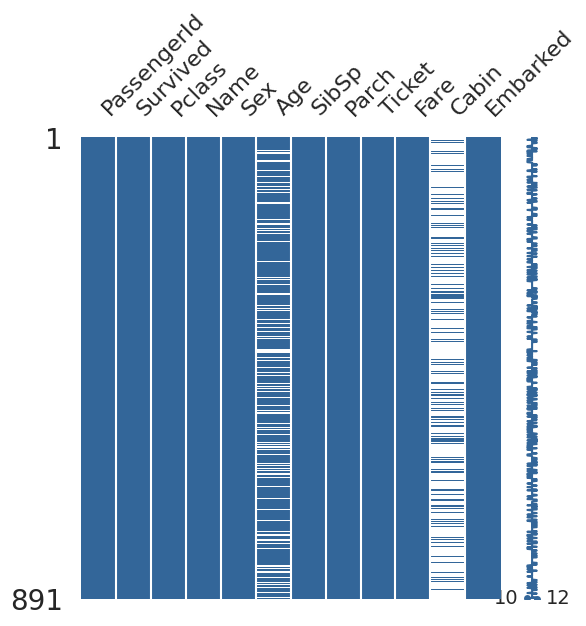

In [36]:
msno.matrix(df=df_train.iloc[:, :], figsize = (6,6), color = (0.2, 0.4, 0.6))

<Axes: >

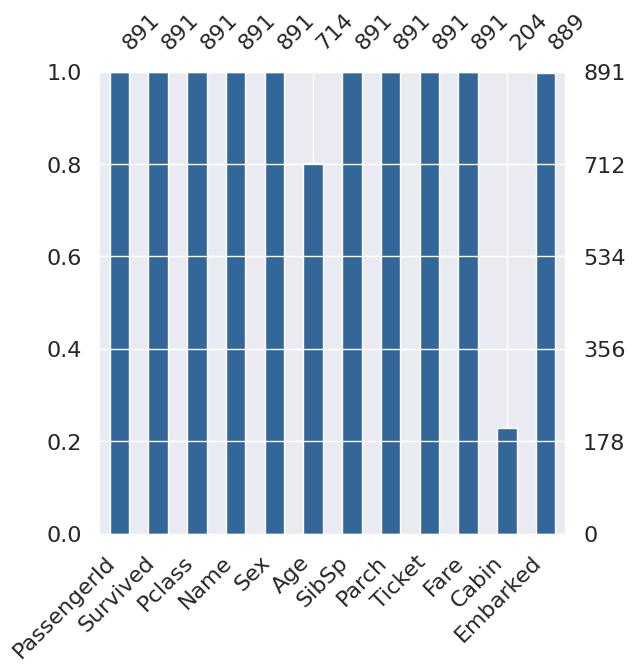

In [37]:
msno.bar(df=df_train.iloc[:, :], figsize = (6,6), color = (0.2, 0.4, 0.6))

### 타겟 레이블 확인

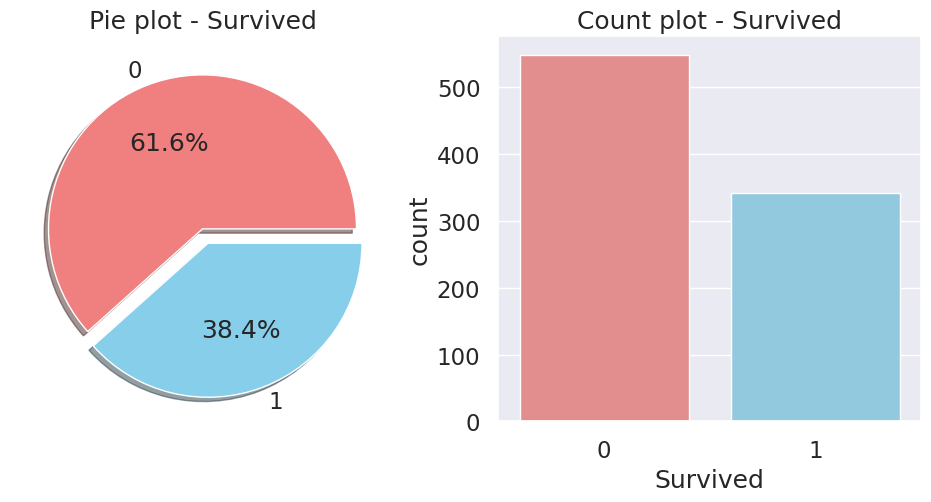

In [45]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))

colors = ['lightcoral', 'skyblue']

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1], palette=colors)
ax[1].set_title('Count plot - Survived')
plt.show()

## **`[2] EDA`**

EDA(Exploratory data analysis, 탐색적 데이터 분석)이란?  
수집한 데이터가 들어왔을 때, 이를 다양한 각도에서 관찰하고 이해하는 과정이다.

### Pclass (티켓의 클래스)

In [48]:
# 각 클래스별 인원수 확인

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [51]:
# 각 클래스별 생존자 확인

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [52]:
# pandas의 crosstab을 이용하여 위 2가지 작업을 한 번에 표현 가능

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

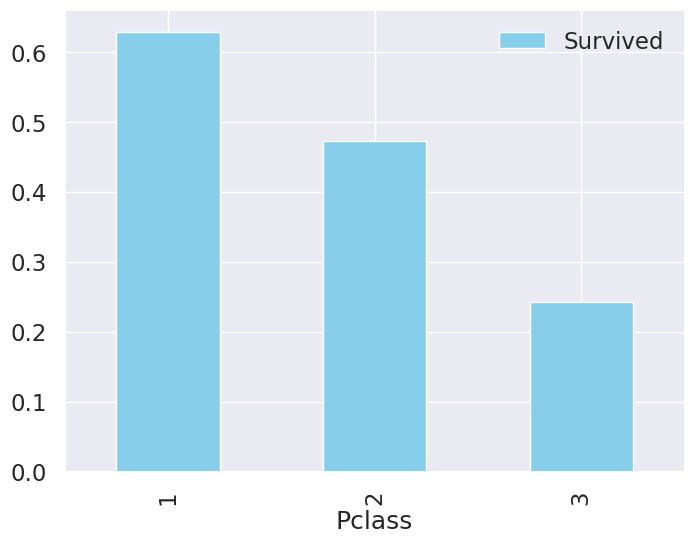

In [62]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(figsize=(8, 6), color = 'skyblue')

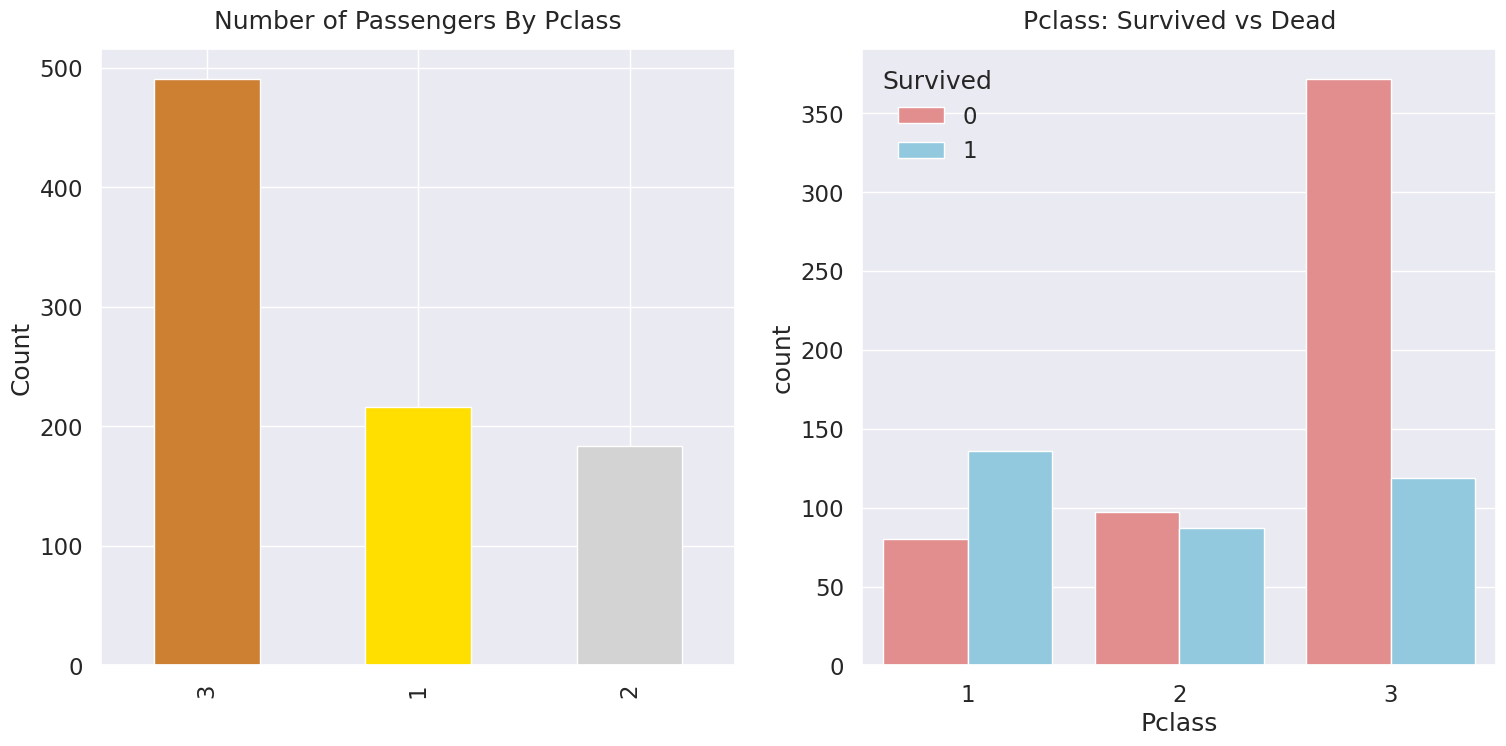

In [65]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

colors = ['lightcoral', 'skyblue']

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1], palette=colors)
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()